In [1]:
from silence_tensorflow import silence_tensorflow
silence_tensorflow()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Inline Plots in Jupyter
%matplotlib inline

In [3]:
from keras.models import load_model

ReLU_model = load_model("../models/ReLU_heart_model.keras")
LeakyReLU_model = load_model("../models/LeakyReLU_heart_model.keras")
PReLU_model = load_model("../models/PReLU_heart_model.keras")
ELU_model = load_model("../models/ELU_heart_model.keras")
SELU_model = load_model("../models/SELU_heart_model.keras")
Tanh_model = load_model("../models/Tanh_heart_model.keras")

I0000 00:00:1755957706.215758    5619 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2143 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [4]:
import joblib

ReLU_logs = joblib.load('../models/logs/ReLU_model_logs.pkl')
LeakyReLU_logs = joblib.load('../models/logs/LeakyReLU_model_logs.pkl')
PReLU_logs = joblib.load('../models/logs/PReLU_model_logs.pkl')
ELU_logs = joblib.load('../models/logs/ELU_model_logs.pkl')
SELU_logs = joblib.load('../models/logs/SELU_model_logs.pkl')
Tanh_logs = joblib.load('../models/logs/Tanh_model_logs.pkl')

history = ReLU_logs['history']
print(f"Model Saved Paramaters {list(history.keys())}")

Model Saved Paramaters ['accuracy', 'auc', 'loss', 'val_accuracy', 'val_auc', 'val_loss', 'learning_rate']


In [5]:
ReLU_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 124)            │         1,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 124)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 124)            │           496 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 124)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 59)             │         7,375 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 59)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 59)             │           236 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 59)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         1,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,914 (136.39 KB)

 Trainable params: 11,494 (44.90 KB)

 Non-trainable params: 430 (1.68 KB)

 Optimizer params: 22,990 (89.81 KB)

In [6]:
LeakyReLU_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 45)             │         5,805 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 45)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 45)             │           180 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 45)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 26)             │         1,196 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 26)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 26)             │           104 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 26)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,054 (109.59 KB)

 Trainable params: 9,218 (36.01 KB)

 Non-trainable params: 398 (1.55 KB)

 Optimizer params: 18,438 (72.03 KB)

In [7]:
PReLU_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 96)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu (PReLU)                 │ (None, 96)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 96)             │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 34)             │         3,298 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu_1 (PReLU)               │ (None, 34)             │            34 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 34)             │           136 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 34)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 29)             │         1,015 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu_2 (PReLU)               │ (None, 29)             │            29 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 29)             │           116 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 29)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            30 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,812 (73.49 KB)

 Trainable params: 6,164 (24.08 KB)

 Non-trainable params: 318 (1.24 KB)

 Optimizer params: 12,330 (48.17 KB)

In [8]:
ELU_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 82)             │         1,148 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu (ELU)                       │ (None, 82)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 82)             │           328 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 82)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 49)             │         4,067 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_1 (ELU)                     │ (None, 49)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 49)             │           196 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 49)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 20)             │         1,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_2 (ELU)                     │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 20)             │            80 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,918 (77.81 KB)

 Trainable params: 6,538 (25.54 KB)

 Non-trainable params: 302 (1.18 KB)

 Optimizer params: 13,078 (51.09 KB)

In [9]:
SELU_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 124)            │         1,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 124)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 124)            │           496 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 124)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 53)             │         6,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 53)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 53)             │           212 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 53)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,272 (114.35 KB)

 Trainable params: 9,628 (37.61 KB)

 Non-trainable params: 386 (1.51 KB)

 Optimizer params: 19,258 (75.23 KB)

In [10]:
Tanh_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 114)            │         1,596 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 114)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 114)            │           456 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 114)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 46)             │         5,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 46)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 46)             │           184 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 46)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 31)             │         1,457 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 31)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 31)             │           124 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 31)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            32 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,655 (104.12 KB)

 Trainable params: 8,757 (34.21 KB)

 Non-trainable params: 382 (1.49 KB)

 Optimizer params: 17,516 (68.43 KB)

In [11]:
data = pd.read_csv("../heart_dataset.csv")

X = data.iloc[:, :13].values
y_true = data["target"].values

In [12]:
# import scaler and scale our test instance
# the test data and pre-train model should be scaled by same scalar
sc = joblib.load("../models/scaler.pkl")
X_scaled = sc.transform(X)

In [13]:
models = {
    'ReLU': ReLU_model,
    'LeakyReLU': LeakyReLU_model,
    'PReLU': PReLU_model,
    'ELU': ELU_model,
    'SELU': SELU_model,
    'Tanh': Tanh_model
}

ReLU_history = ReLU_logs['history']
LeakyReLU_history = LeakyReLU_logs['history']
PReLU_history =  PReLU_logs['history']
ELU_history = ELU_logs['history']
SELU_history = SELU_logs['history']
Tanh_history = Tanh_logs['history']

history = {
    'ReLU': ReLU_history,
    'LeakyReLU': LeakyReLU_history,
    'PReLU': PReLU_history,
    'ELU': ELU_history,
    'SELU': SELU_history,
    'Tanh': Tanh_history
}

model_names = ['ReLU', 'LeakyReLU', 'PReLU', 'ELU', 'SELU', 'Tanh']

In [14]:
def plot_stats(ax, model_name, metric):
    model_history = history.get(model_name, {})
    train_metric = model_history.get(metric)
    val_metric = model_history.get(f'val_{metric}')

    if train_metric is None or val_metric is None:
        ax.set_title(f"{model_name}: '{metric}' not found")
        ax.axis('off')
        return

    ax.plot(train_metric, label='Train')
    ax.plot(val_metric, label='Validation')
    ax.set_title(f'{model_name}')
    ax.set_xlabel('Epochs')
    ax.set_ylabel(metric.capitalize())
    ax.legend()
    ax.grid(True)

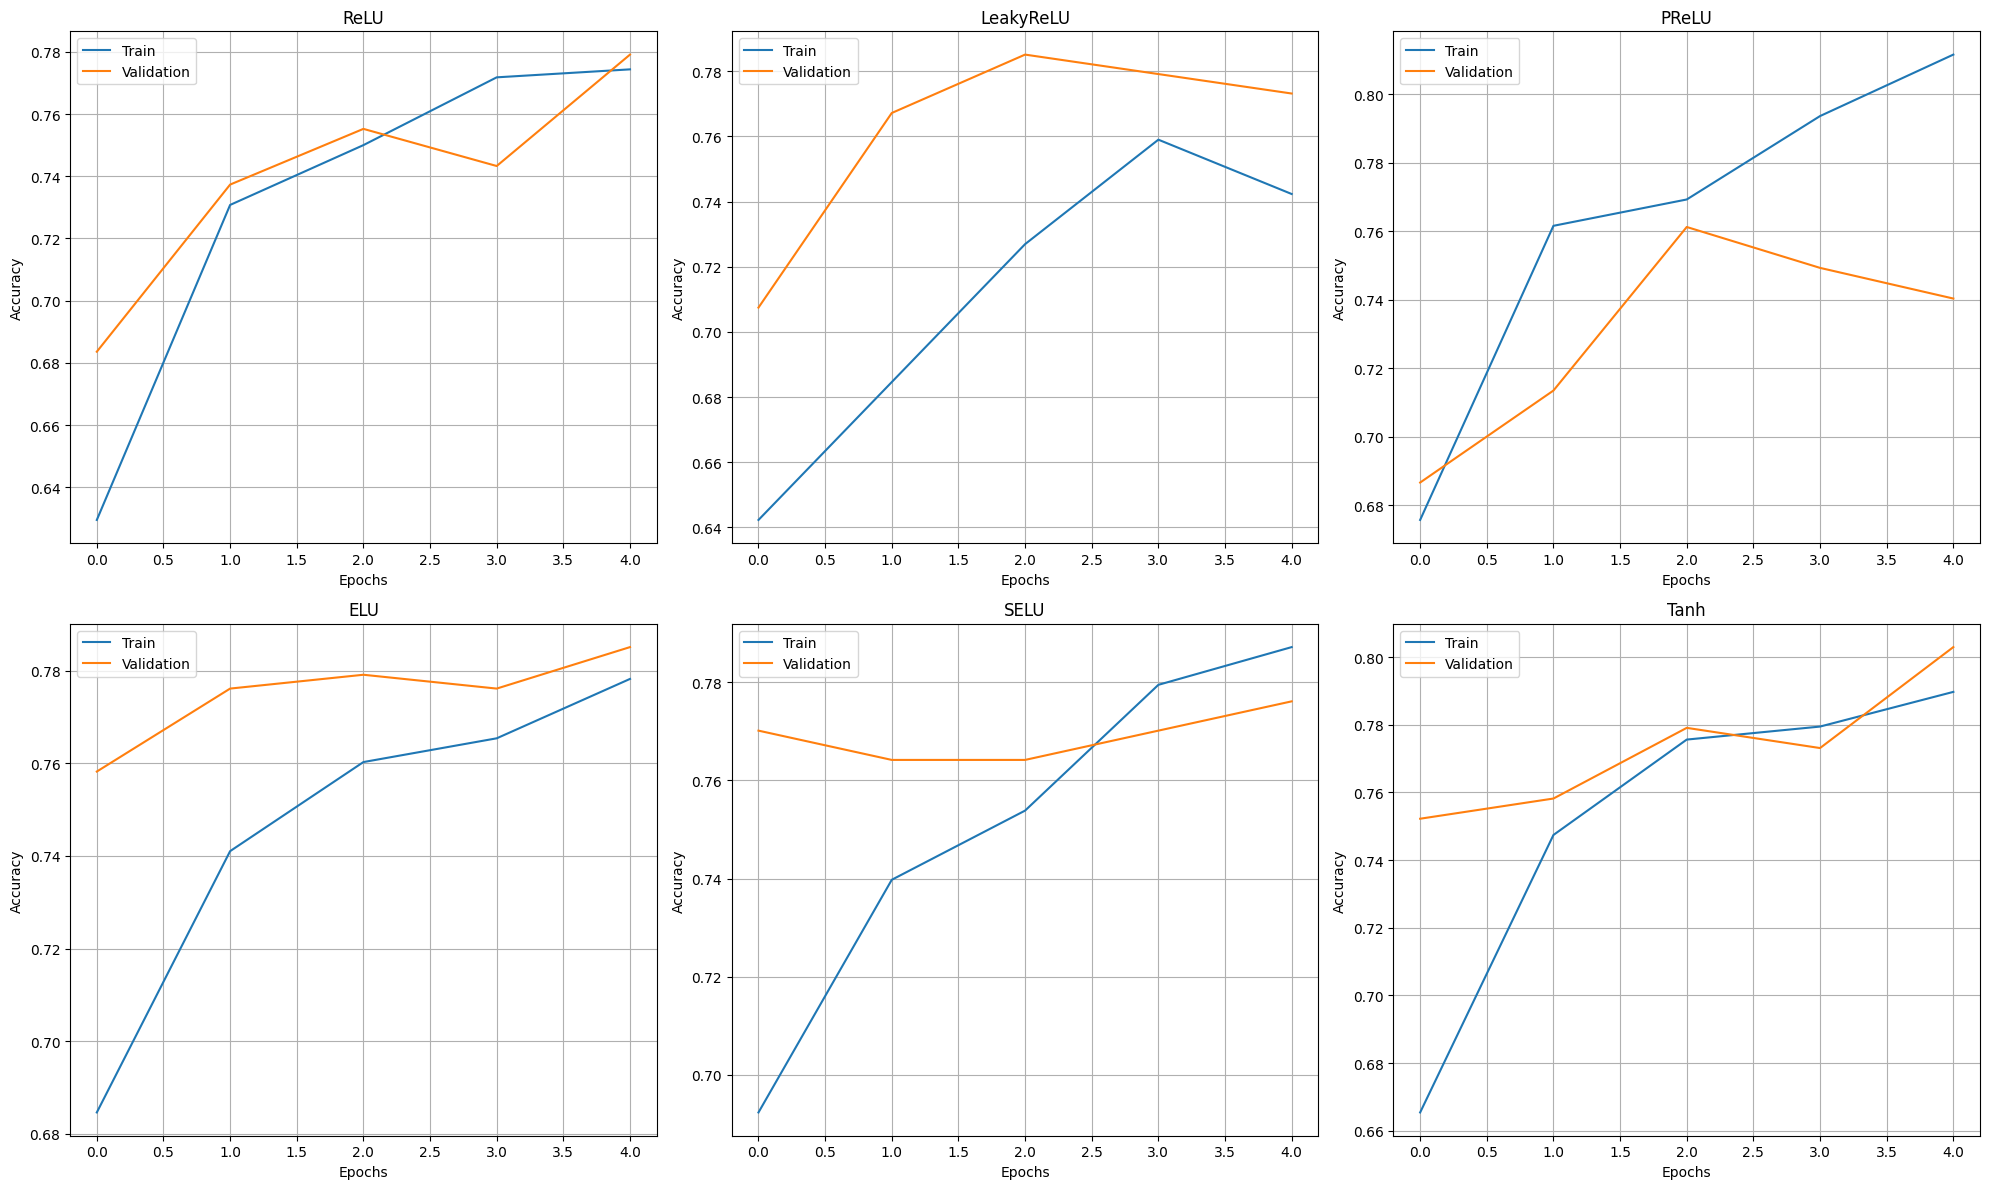

In [15]:
metric = 'accuracy'

fig, axes = plt.subplots(2, 3, figsize=(5 * 4, 4 * 3))
axes = axes.flatten()

for i, model_name in enumerate(model_names):
    plot_stats(axes[i], model_name, metric)

plt.tight_layout()
plt.show()

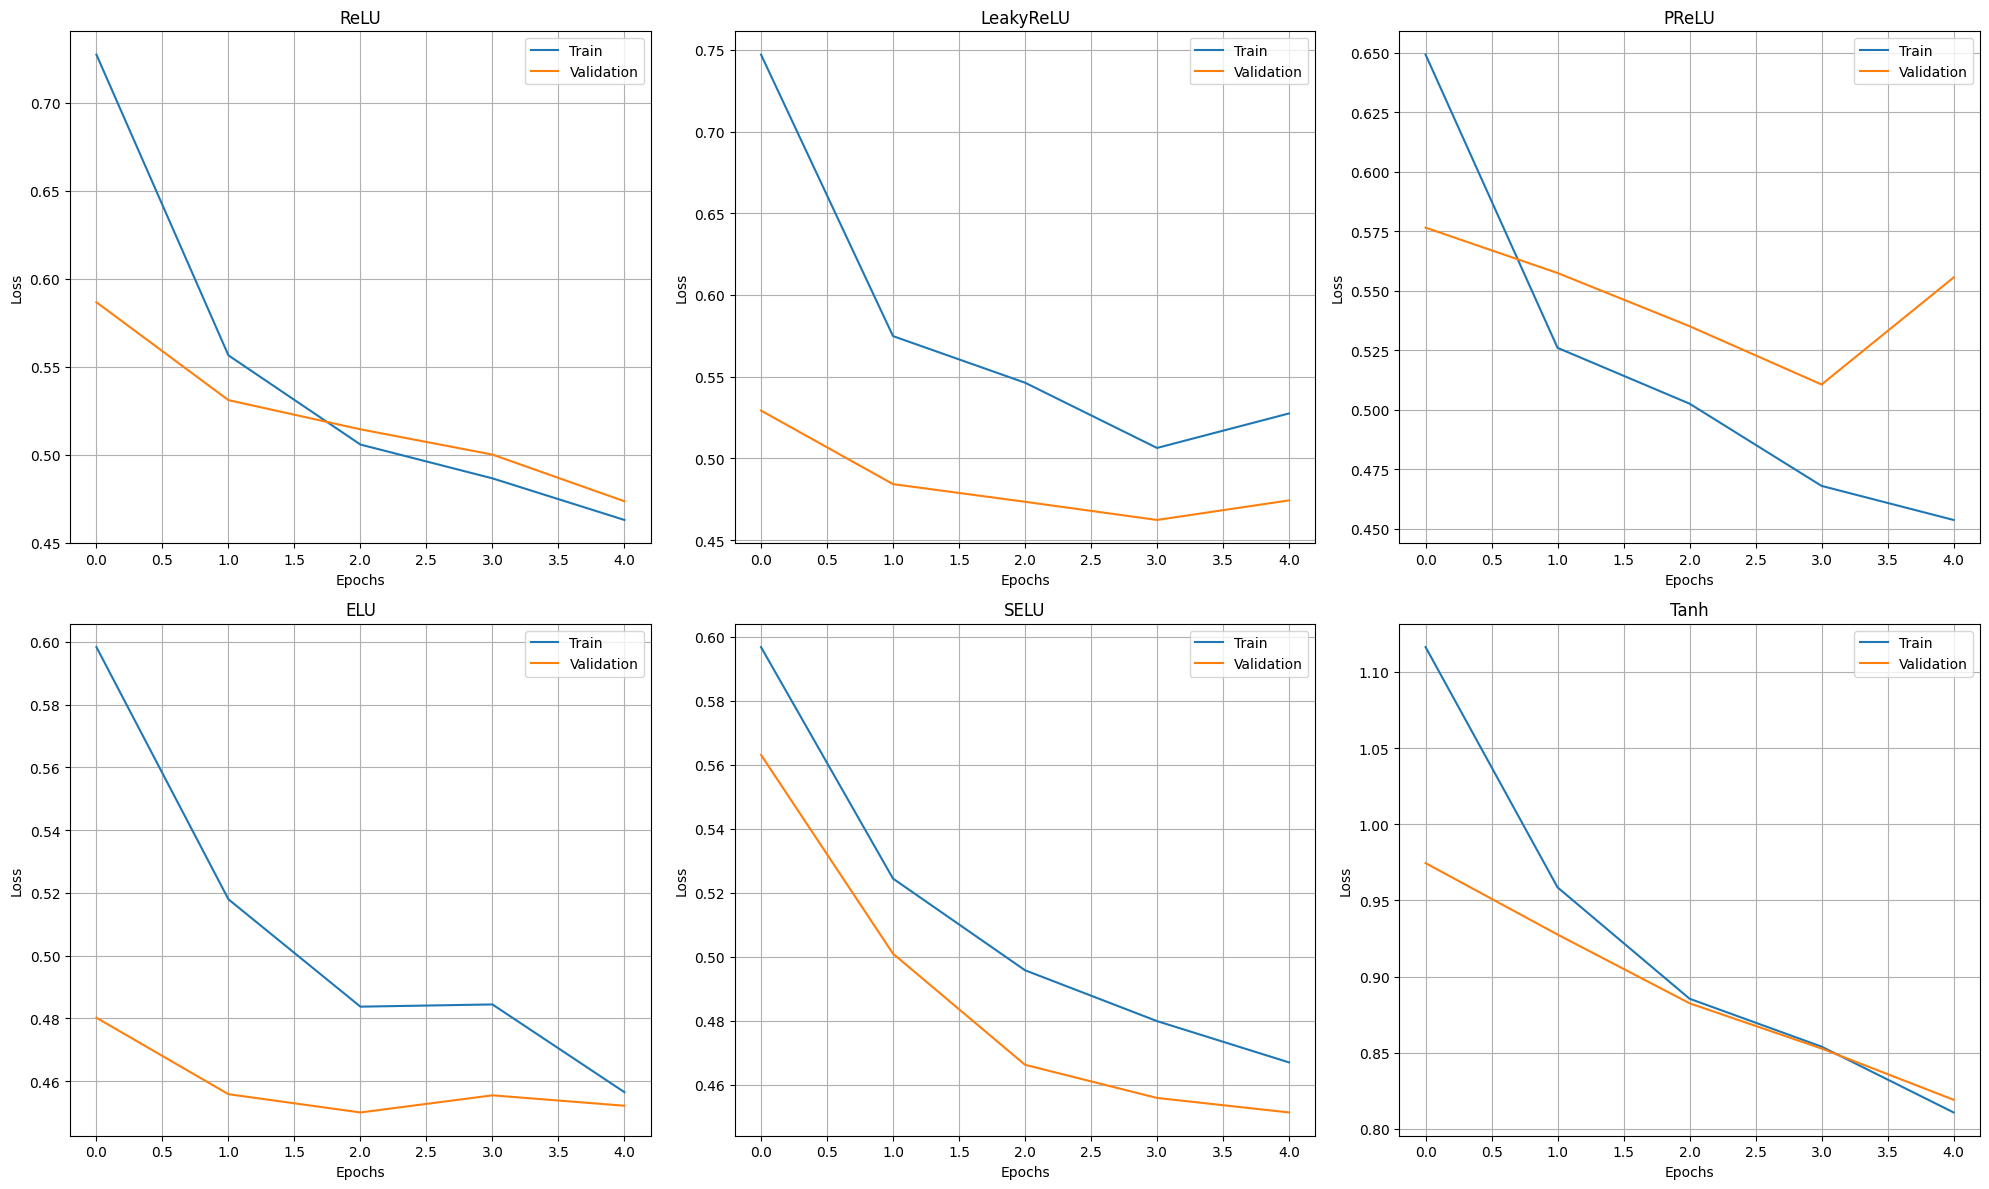

In [16]:
metric = 'loss'

fig, axes = plt.subplots(2, 3, figsize=(5 * 4, 4 * 3))
axes = axes.flatten()

for i, model_name in enumerate(model_names):
    plot_stats(axes[i], model_name, metric)

plt.tight_layout()
plt.show()

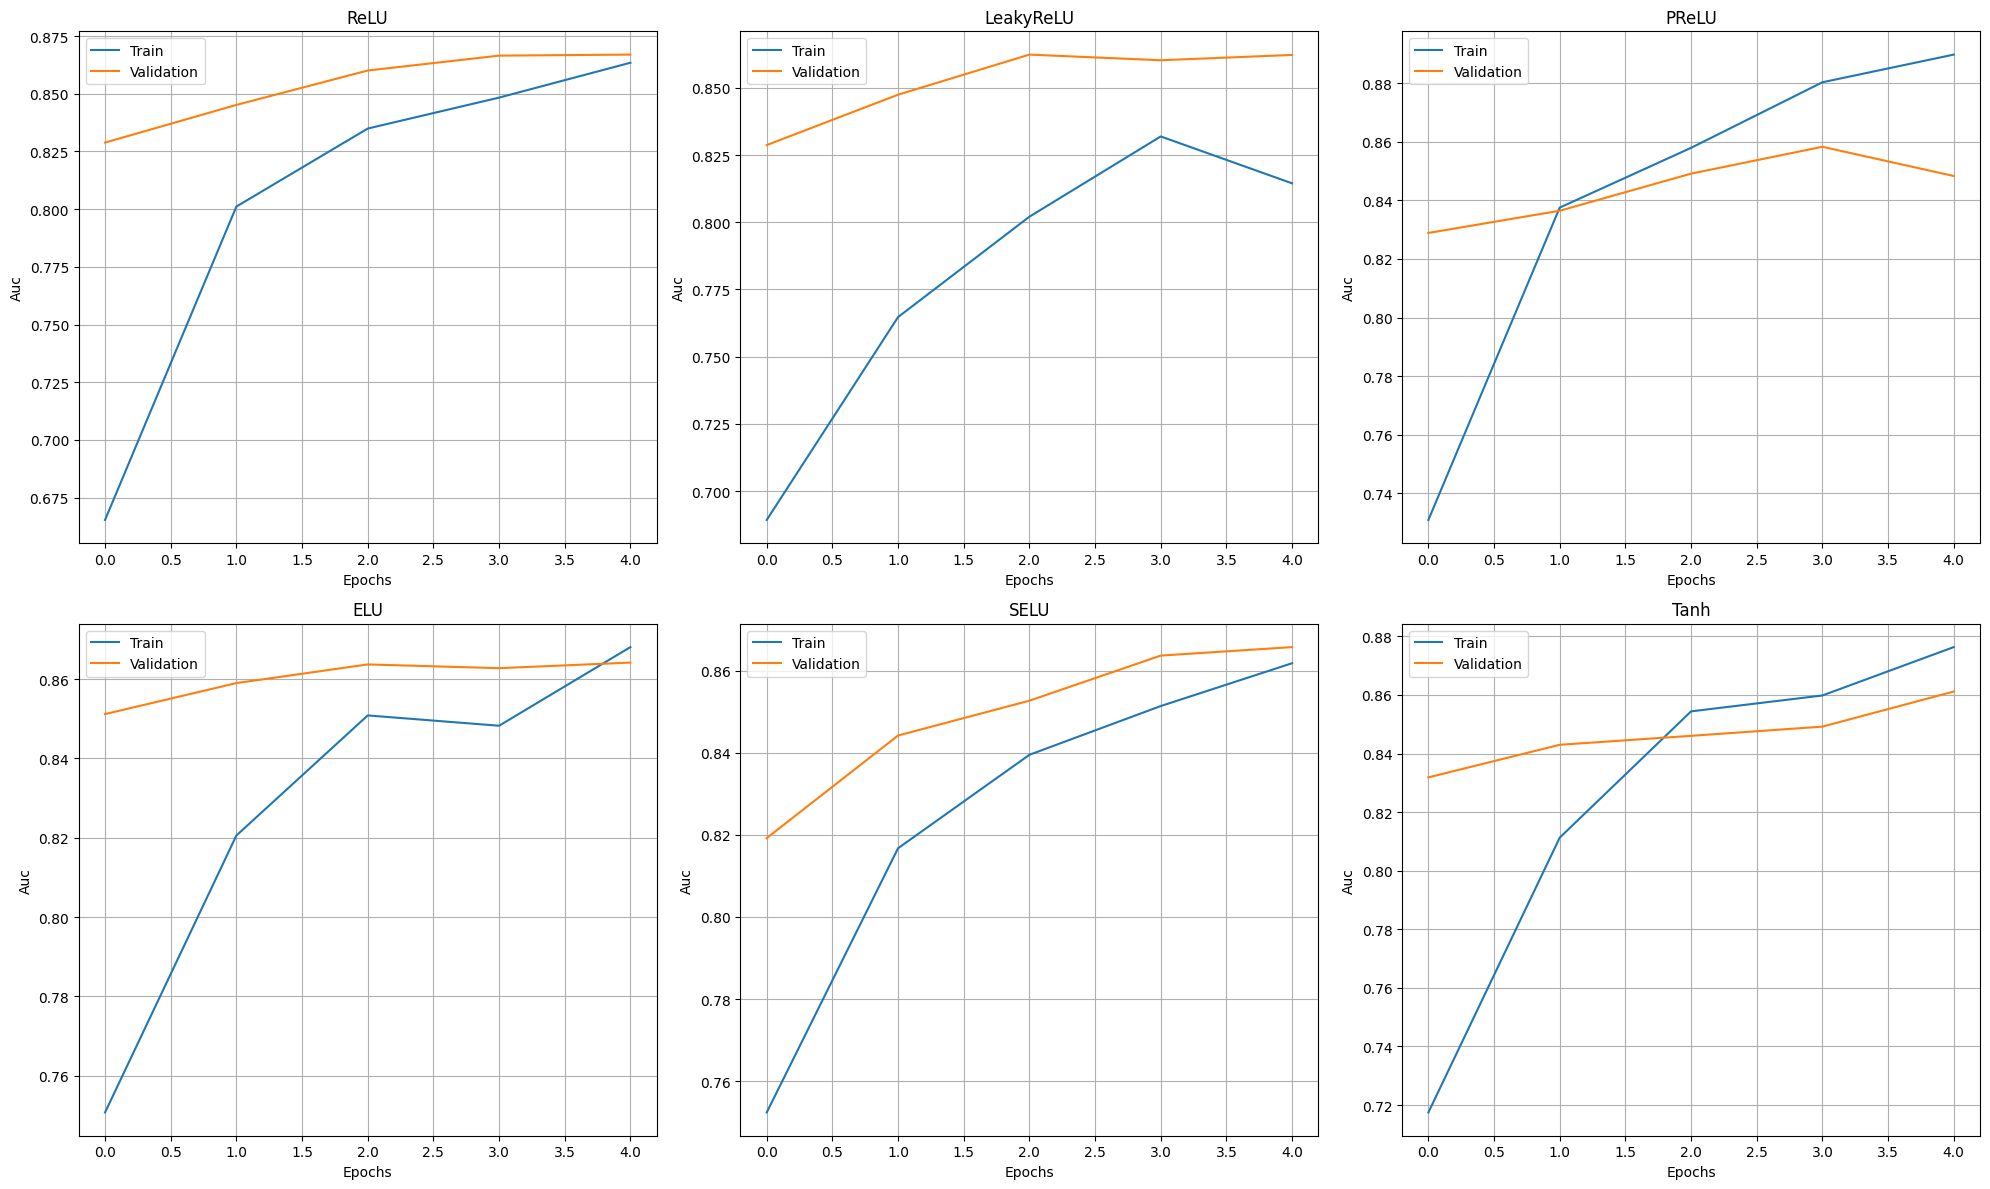

In [17]:
metric = 'auc'

fig, axes = plt.subplots(2, 3, figsize=(5 * 4, 4 * 3))
axes = axes.flatten()

for i, model_name in enumerate(model_names):
    plot_stats(axes[i], model_name, metric)

plt.tight_layout()
plt.show()

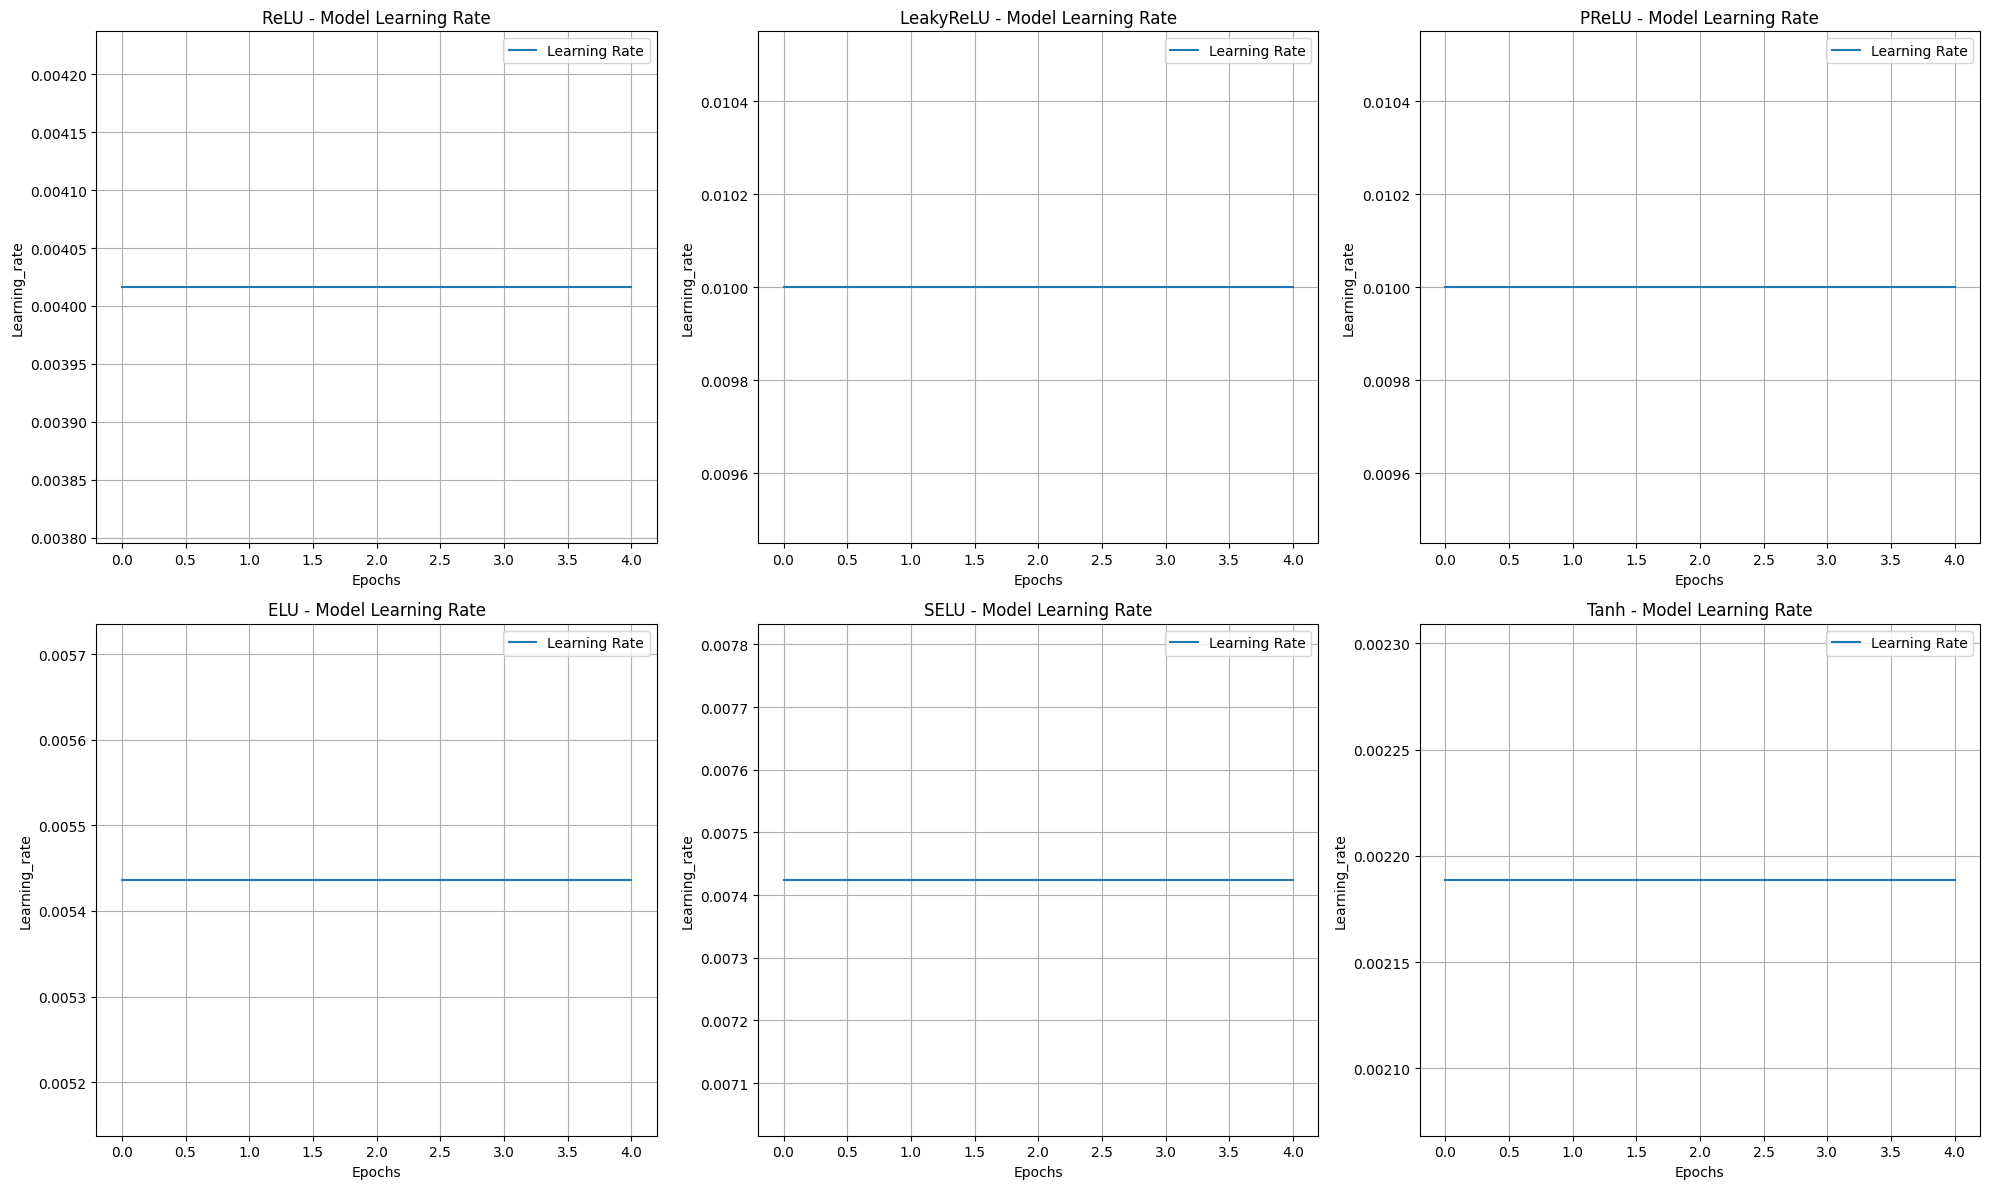

In [18]:
metric = 'learning_rate'


def plot_stats(ax, model_name):
    model_history = history.get(model_name, {})
    train_metric = model_history.get('learning_rate')

    if train_metric is None:
        ax.set_title(f"{model_name}: '{metric}' not found")
        ax.axis('off')
        return

    ax.plot(train_metric, label='Learning Rate')
    ax.set_title(f'{model_name} - Model Learning Rate')
    ax.set_xlabel('Epochs')
    ax.set_ylabel(metric.capitalize())
    ax.legend()
    ax.grid(True)

fig, axes = plt.subplots(2, 3, figsize=(5 * 4, 4 * 3))
axes = axes.flatten()

for i, model_name in enumerate(model_names):
    plot_stats(axes[i], model_name)

plt.tight_layout()
plt.show()

In [19]:
from sklearn.metrics import accuracy_score

def model_accuracy(model):
    model_prob = models[model].predict(X_scaled)
    model_pred = (model_prob > 0.5).astype(int).flatten()
    accuracy = accuracy_score(y_true, model_pred)
    print(f"{model} Accuracy: {round(accuracy*100, 2)}%")

for model in ['ReLU', 'LeakyReLU', 'PReLU', 'ELU', 'SELU', 'Tanh']:
    model_accuracy(model)

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
ReLU Accuracy: 81.39%
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
LeakyReLU Accuracy: 79.07%
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
PReLU Accuracy: 78.87%
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
ELU Accuracy: 80.33%
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
SELU Accuracy: 79.47%
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Tanh Accuracy: 78.81%


In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(ax, model):
    model_prob = models[model].predict(X_scaled, verbose=0)
    model_pred = (model_prob > 0.5).astype(int).flatten()
    cm = confusion_matrix(y_true, model_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax, cmap='magma', colorbar=False)
    ax.set_title(f"{model}")

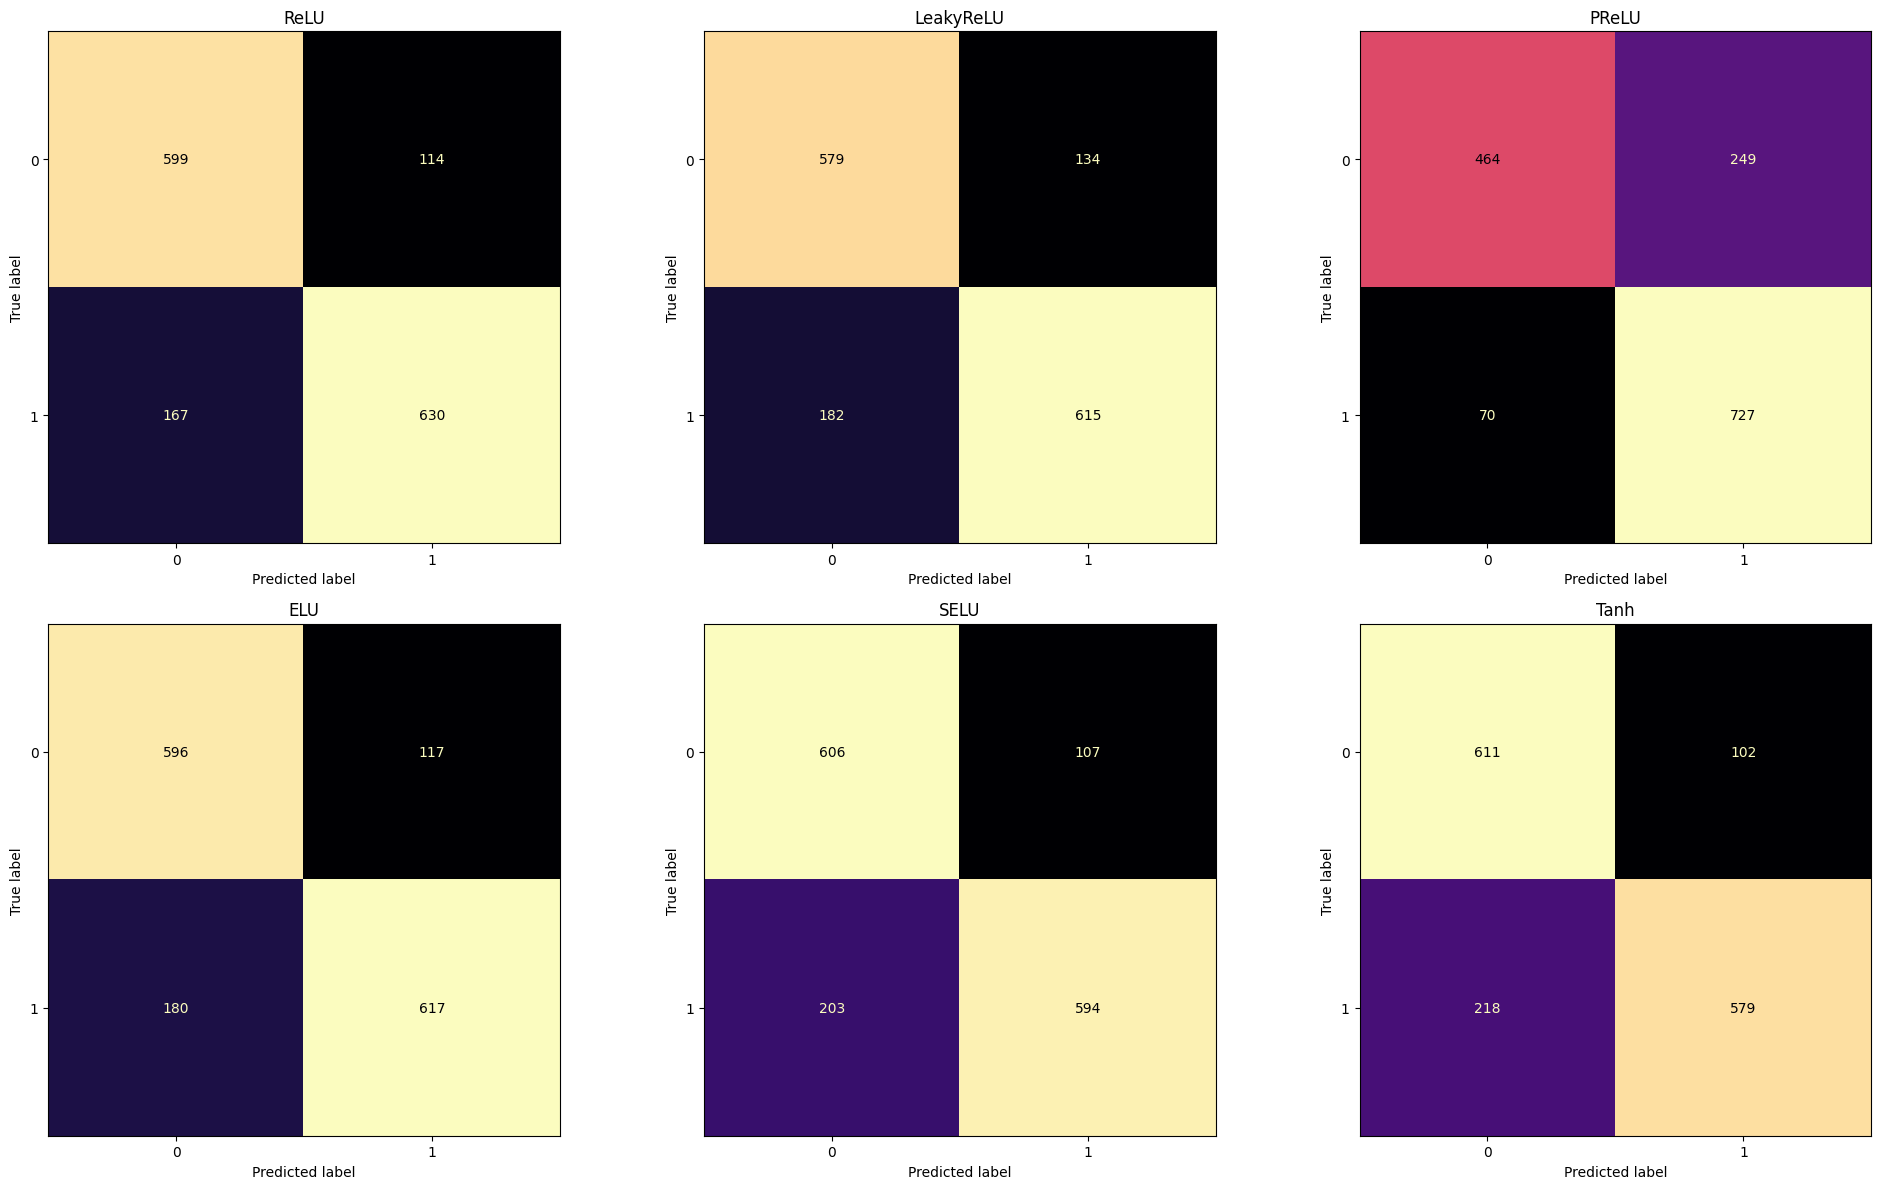

In [21]:
fig, axes = plt.subplots(2, 3, figsize=(5 * 4, 4 * 3))
axes = axes.flatten()

for i, model in enumerate(model_names):
    plot_confusion_matrix(axes[i], model)

plt.tight_layout()
plt.show()